In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your CSV file
csv_file_path = 'dataset_2019_2022.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
print(df.tail(100))

       customer_id  product_id  basket_id      loyalty         household_type  \
40022        23655     5996469      70222  Promiscuous            Single male   
40023        23655     1027960      70222  Promiscuous            Single male   
40024        23655      820165      70222  Promiscuous            Single male   
40025        23655     1107705      70222  Promiscuous            Single male   
40026        23655      922127      70222  Promiscuous            Single male   
...            ...         ...        ...          ...                    ...   
40117        23676    12673243      72700     Loyalist  2 adults with no kids   
40118        23676     1106523      72700     Loyalist  2 adults with no kids   
40119        23676      836163      72700     Loyalist  2 adults with no kids   
40120        23676      964356      72700     Loyalist  2 adults with no kids   
40121        23676     1048256      72700            L                    NaN   

      age_band      departm

In [2]:
distinct_values = df['loyalty'].unique()

In [ ]:
distinct_values

array(['Loyalist', 'Promiscuous', 'First Time Buyer', nan], dtype=object)

In [ ]:
#Find the average spend of loyalist customer

In [3]:
# Assuming your DataFrame is named df
# Replace 'spend' with the actual column name representing the spend in your DataFrame
average_spend_loyalist = df[df['loyalty'] == 'Loyalist']['price'].mean()



print("Average spend of Loyalist customers:", average_spend_loyalist)

Average spend of Loyalist customers: 3.196292006292006


In [4]:


# Filter the DataFrame for loyal customers
loyal_customers_df = df[df['loyalty'] == 'Loyalist']

# Group by department and calculate the total price spent in each department
department_totals = loyal_customers_df.groupby('department')['price'].sum()



# Display the total price spent in each department for loyal customers
print("Total Price Spent in Each Department for Loyal Customers:\n", department_totals)

Total Price Spent in Each Department for Loyal Customers:
 department
Cosmetics           525.42
Deli               2726.29
Floral              412.96
Grocery           11636.55
Meat               9270.67
Nutrition          1488.44
Pastry             2456.33
Pharmaceutical     7878.20
Produce            6544.38
Salad Bar           330.99
Seafood            1433.11
Name: price, dtype: float64


In [5]:
import matplotlib.pyplot as plt
# Filter the DataFrame for loyal customers
loyal_customers_df = df[df['loyalty'] == 'Loyalist']

# Group by department and calculate the total price spent in each department
department_totals = loyal_customers_df.groupby('department')['price'].sum()

# Create a barplot
plt.bar(department_totals.index, department_totals.values, color='skyblue')
plt.xlabel('Category of Expenditure')
plt.ylabel('Expenditure in each Department')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.title('Total Price Spent in Each Department for Loyal Customers')
plt.show()

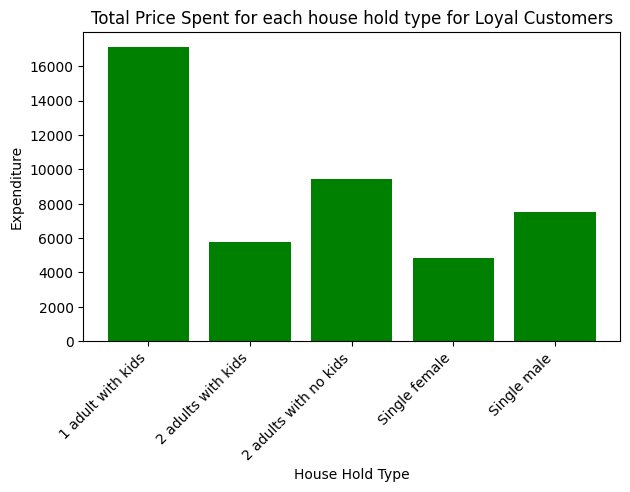

In [6]:
# Group by department and calculate the total price spent in each department
department_totals = loyal_customers_df.groupby('household_type')['price'].sum()

# Create a barplot
plt.bar(department_totals.index, department_totals.values, color='green')
plt.xlabel('House Hold Type')
plt.ylabel('Expenditure')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.title('Total Price Spent for each house hold type for Loyal Customers')
plt.show()

In [7]:
# Group by department and calculate the total price spent in each department
department_totals = loyal_customers_df.groupby('brand')['price'].sum()

# Create a barplot
plt.bar(department_totals.index, department_totals.values, color='green')
plt.xlabel('brand')
plt.ylabel('Expenditure')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.title('Total Price Spent for each house hold type for Loyal Customers')
plt.show()

In [8]:

    #---------------------
    # Group by age_band and calculate the total price spent in each department
    first_time_buyer = df[df['loyalty'] == 'First Time Buyer']
    loyalist_count = first_time_buyer.groupby('age_band')['price'].sum()

    # Create a barplot
    plt.bar(loyalist_count.index, loyalist_count.values, color='red')
    plt.xlabel('Age_band')
    plt.ylabel('Expenditure')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Ensure the labels fit within the figure
    plt.title('Total expenditure by each first time buyer')
    plt.show()

    print(loyalist_count)

age_band
19-24    1227.17
25-34     662.36
35-44     122.43
Name: price, dtype: float64


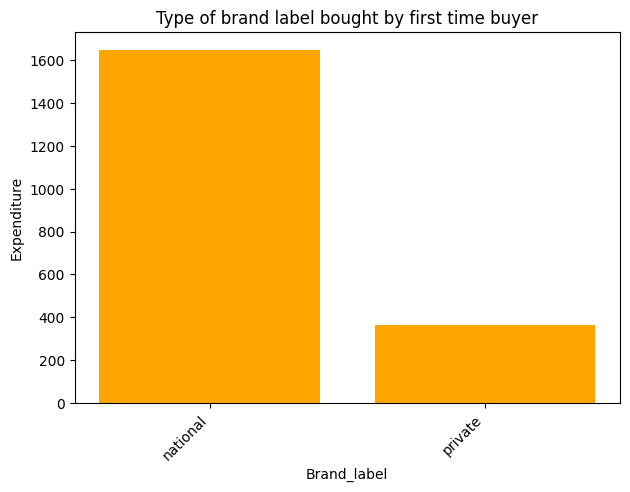

brand
national    1650.49
private      361.47
Name: price, dtype: float64


In [9]:
  loyalist_count_brand = first_time_buyer.groupby('brand')['price'].sum()

  # Create a barplot
  plt.bar(loyalist_count_brand.index, loyalist_count_brand.values, color ='orange')

  plt.xlabel('Brand_label')
  plt.ylabel('Expenditure')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Ensure the labels fit within the figure
  plt.title('Type of brand label bought by first time buyer')
  plt.show()

  print(loyalist_count_brand)

In [11]:
popular_departments = first_time_buyer['department'].value_counts()
popular_departments

Grocery           214
Produce           127
Pharmaceutical    100
Meat               85
Pastry             42
Deli               26
Nutrition          24
Seafood             9
Floral              4
Cosmetics           2
Salad Bar           2
Name: department, dtype: int64

In [12]:
popular_brands = first_time_buyer['brand'].value_counts()
popular_brands

national    507
private     128
Name: brand, dtype: int64

In [15]:
popular_commodities = first_time_buyer['commodity'].value_counts()
popular_commodities

Candy                       24
Lunch meat                  20
Beef                        20
Cheese                      16
Soft drinks                 16
                            ..
Dishwash detergents          1
Eggs                         1
Electrical suppplies         1
Dog foods                    1
Dry tea/coffee/cocoa mix     1
Name: commodity, Length: 161, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming popular_departments, popular_brands, and popular_commodities are already created

# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Bar chart for Popular Departments
sns.barplot(x=popular_departments.index, y=popular_departments.values, ax=axes[0])
axes[0].set_title('Popular Departments for First-Time Customers')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Number of Occurrences')

# Bar chart for Popular Brands
sns.barplot(x=popular_brands.index, y=popular_brands.values, ax=axes[1])
axes[1].set_title('Popular Brands for First-Time Customers')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Number of Occurrences')

# Bar chart for Popular Commodities
sns.barplot(x=popular_commodities.index, y=popular_commodities.values, ax=axes[2])
axes[2].set_title('Popular Commodities for First-Time Customers')
axes[2].set_xlabel('Commodity')
axes[2].set_ylabel('Number of Occurrences')
axes[2].tick_params(axis='x', rotation=90, labelsize=6)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>